# Pandas Time Series Analysis 
## Summarize Data with a Datetime Index

In [ ]:
# imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
#import warnings
from datetime import datetime
from datetime import timedelta
#from dateutil.relativedelta import relativedelta
from IPython.display import display
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline
plotsize = (13, 5)

In [ ]:
df = pd.read_excel("./data/Sample-Store-Data.xls")
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [ ]:
variables = ['Order Date', 'Category', 'Sales']
base = df[variables]
base.head()

Order Date         Category  Sales
0 2013-11-09        Furniture 261.96
1 2013-11-09        Furniture 731.94
2 2013-06-13  Office Supplies  14.62
3 2012-10-11        Furniture 957.58
4 2012-10-11  Office Supplies  22.37

In [ ]:
#grouping order date and Category and sum their sales value
group_variables = variables[:2]
outcome_variable = variables[2]
grouped_df = base.groupby(group_variables)[outcome_variable].sum().reset_index()
grouped_df.head()

Order Date         Category    Sales
0 2011-01-04  Office Supplies    16.45
1 2011-01-05  Office Supplies   288.06
2 2011-01-06  Office Supplies    19.54
3 2011-01-07        Furniture 2,573.82
4 2011-01-07  Office Supplies   685.34

In [ ]:
order_date_Monthly = np.array(grouped_df['Order Date'], dtype = 'datetime64[M]')
order_date_Monthly

array(['2011-01', '2011-01', '2011-01', ..., '2014-12', '2014-12',
       '2014-12'], dtype='datetime64[M]')

Using this numpy method we will access to all year-month values rather than just unique 12 months.

In [ ]:
print(f'Total number of month: {len(np.unique(order_date_Monthly))}')
print(f'Unique categories: {grouped_df["Category"].unique()}')

Total number of month: 48
Unique categories: ['Office Supplies' 'Furniture' 'Technology']


### Standarsizing the datetime index
- No duplicate index values 
- No missing index values 

#### Handle duplicates
There are duplicates in "Order Date" datetime64 column of groupby dataframe. In order to make this datetime64 column as index we need to remove duplicates. Duplicates are because of multiple categories in the same date. So we assign separate column for each "Category"  value using pivot concept.

In [ ]:
# Method 1: pivot on the grouped data because pivot does not support data aggregation
#           pivot uses unique values from specified index
#           pivot reshapes data based on column values
salesp = grouped_df.pivot(index = 'Order Date', columns = 'Category', values = 'Sales').fillna(0)
salesp.columns = salesp.columns.rename(None)
display(salesp.head(10))
# Removed duplicates from datetime variable and set it as index


# Method 2: pivot_table directly on data because pivot_table supports data aggregation
#           Pivot_table uses mean as default aggregation
salesp2 = base.pivot_table(index = 'Order Date', columns = 'Category', aggfunc = 'sum').fillna(0).head(10)
display(salesp2.head(10))

Furniture  Office Supplies  Technology
Order Date                                        
2011-01-04       0.00            16.45        0.00
2011-01-05       0.00           288.06        0.00
2011-01-06       0.00            19.54        0.00
2011-01-07   2,573.82           685.34    1,147.94
2011-01-08      76.73            10.43        0.00
2011-01-10       0.00             9.34       31.20
2011-01-11      51.94             2.89        0.00
2011-01-12       9.94             0.00        0.00
2011-01-14     879.94         2,027.12      646.74
2011-01-15      61.96             0.00        0.00

Sales                           
Category   Furniture Office Supplies Technology
Order Date                                     
2011-01-04      0.00           16.45       0.00
2011-01-05      0.00          288.06       0.00
2011-01-06      0.00           19.54       0.00
2011-01-07  2,573.82          685.34   1,147.94
2011-01-08     76.73           10.43       0.00
2011-01-10      0.00            9.34      31.20
2011-01-11     51.94            2.89       0.00
2011-01-12      9.94            0.00       0.00
2011-01-14    879.94        2,027.12     646.74
2011-01-15     61.96            0.00       0.00

In [ ]:
# Method 3: "Unstacking"
#           Applying on a grouped data
#           First make the combined index which is causing duplicates

sales = grouped_df.set_index(['Order Date', 'Category']).unstack('Category').fillna(0)
display(sales.head())
sales.columns = sales.columns.levels[1].rename(None) # we have to use level. 
sales.head()

Sales                           
Category   Furniture Office Supplies Technology
Order Date                                     
2011-01-04      0.00           16.45       0.00
2011-01-05      0.00          288.06       0.00
2011-01-06      0.00           19.54       0.00
2011-01-07  2,573.82          685.34   1,147.94
2011-01-08     76.73           10.43       0.00

Furniture  Office Supplies  Technology
Order Date                                        
2011-01-04       0.00            16.45        0.00
2011-01-05       0.00           288.06        0.00
2011-01-06       0.00            19.54        0.00
2011-01-07   2,573.82           685.34    1,147.94
2011-01-08      76.73            10.43        0.00

In [ ]:
# to explicitely assign datetime column as index we also couls use below command
base.set_index('Order Date', inplace = True)

#### Handle missing values
Now we have a datetime64 index without any duplicate.
We also need to make sure there is no missing period to standardize our index and have a set ferquency for it.

In [ ]:
sales.index

DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-08', '2011-01-10', '2011-01-11', '2011-01-12',
               '2011-01-14', '2011-01-15',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=1238, freq=None)

Pandas will automatically set the frequency for standard index. We see there is no ferequency set for our datetime64 index. Let's check for missing values in our index.

In [ ]:
sales.index.max()-sales.index.min()

Timedelta('1457 days 00:00:00')

In [ ]:
print(f'Unique days in our data: {len(sales.index.unique())}')
print(f'Total days in our data range: {(sales.index.max()-sales.index.min()).days}')

Unique days in out data: 1238
Total days in out data range: 1457


We are missing some days in our index column. To fill the gap we can create a complete range and tell Pandas how to treat mmissing values. In this case we want to use zero for days without sales data.

In [ ]:
new_index = pd.date_range(sales.index.min(), sales.index.max())
sales_new = sales.reindex(new_index, fill_value = 0)

In [ ]:
sales_new.index

DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-08', '2011-01-09', '2011-01-10', '2011-01-11',
               '2011-01-12', '2011-01-13',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', length=1458, freq='D')

Now that we have an standardized index, the index frequency is filled as day automatically by Pandas. The range of index is also equal to the full expected range.

### Resampling & Visualization
With our standardized datatime64 index we can resample our data at any desigred frequency.

Weekly Sales 
             Furniture  Office Supplies  Technology
2011-01-09   2,650.55         1,019.81    1,147.94
2011-01-16   1,003.78         2,039.35      827.89
2011-01-23   1,747.33           871.08      824.13
2011-01-30     550.20           680.34      343.33
2011-02-06     290.67           502.68      649.86


<Axes: title={'center': 'Weekly Sales'}>

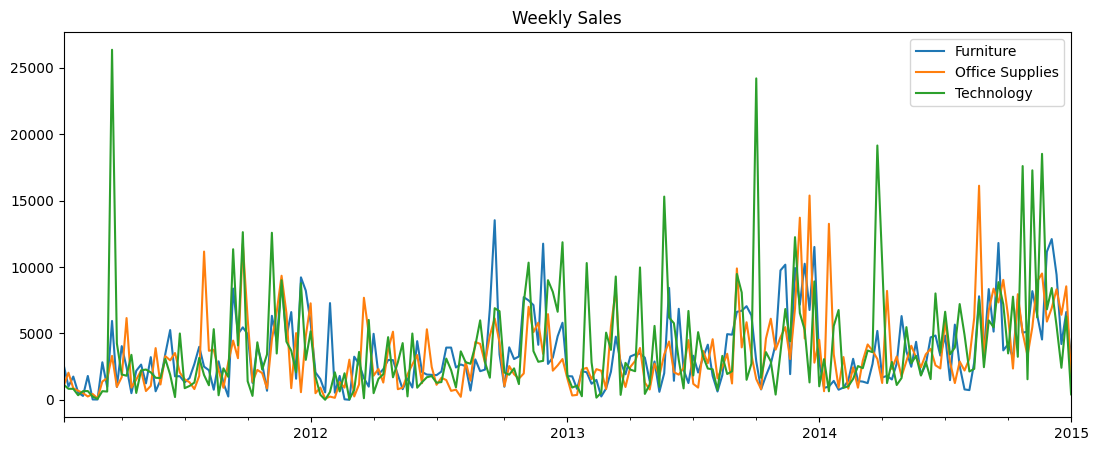

In [ ]:
# Create resample object and ull date out of it
sales_weekly = sales_new.resample('W').sum()
print('Weekly Sales \n', sales_weekly.head())
sales_weekly.plot(figsize=plotsize, title='Weekly Sales')

Monthly Sales 
             Furniture  Office Supplies  Technology
2011-01-31   5,951.86         4,851.08    3,143.29
2011-02-28   2,130.32         1,071.72    1,608.51
2011-03-31  14,573.96         8,605.88   32,511.17
2011-04-30   7,944.84        11,155.07    9,195.43
2011-05-31   6,912.79         7,135.62    9,599.88


<Axes: title={'center': 'Weekly Sales'}>

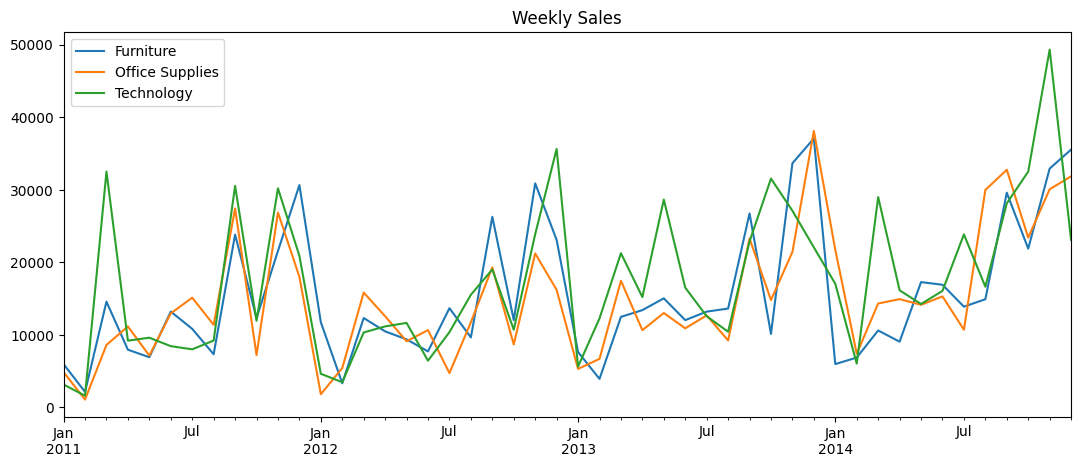

In [ ]:
sales_monthly = sales_new.resample('M').sum()
print('Monthly Sales \n', sales_monthly.head())
sales_monthly.plot(figsize = plotsize, title= 'Weekly Sales')

Quarterly Sales 
             Furniture  Office Supplies  Technology
2011-03-31  22,656.14        14,528.68   37,262.97
2011-06-30  28,063.75        31,243.74   27,231.28
2011-09-30  41,957.88        53,923.97   47,751.37
2011-12-31  64,515.09        52,080.03   63,032.62
2012-03-31  27,374.10        23,059.39   18,418.25


<Axes: title={'center': 'Quarterly Sales'}>

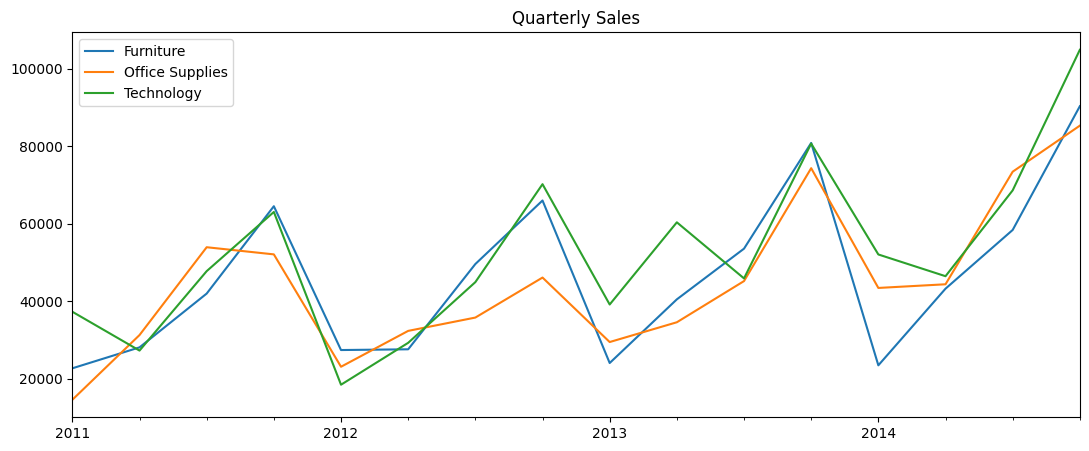

In [ ]:
sales_quarterly = sales_new.resample('Q').sum()
print('Quarterly Sales \n', sales_quarterly.head())
sales_quarterly.plot(figsize = plotsize, title= 'Quarterly Sales')

Anualy Sales 
             Furniture  Office Supplies  Technology
2011-12-31 157,192.85       151,776.41  175,278.23
2012-12-31 170,518.24       137,233.46  162,780.81
2013-12-31 198,901.44       183,510.59  226,061.80
2014-12-31 215,387.27       246,526.57  272,033.19


<Axes: title={'center': 'Anualy Sales'}>

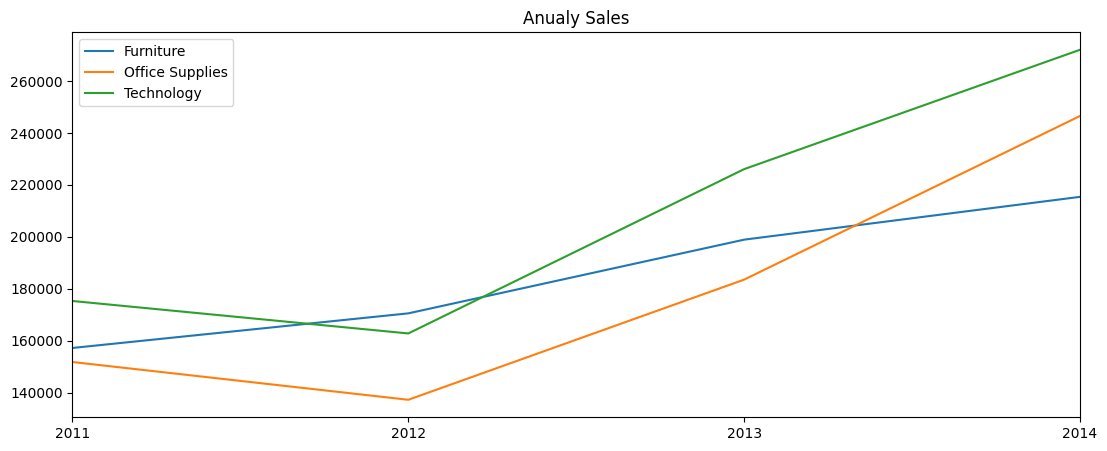

In [ ]:
sales_annualy = sales_new.resample('Y').sum()
print('Anualy Sales \n', sales_annualy.head())
sales_annualy.plot(figsize = plotsize, title= 'Anualy Sales')

### Stationarity Transformations

In [ ]:
# Variable First Difference
# sales_monthly = sales_new.resample('M').sum()
print('Monthly Sales, First Difference: \n')
sales_monthly.diff().head()

Monthly Sales, First Difference: 



Furniture  Office Supplies  Technology
2011-01-31        NaN              NaN         NaN
2011-02-28  -3,821.54        -3,779.36   -1,534.78
2011-03-31  12,443.63         7,534.16   30,902.66
2011-04-30  -6,629.12         2,549.19  -23,315.74
2011-05-31  -1,032.05        -4,019.45      404.44

For instance, in furniture sales, we can see 3821.54 decrease and an increase of 12433.63 in the following month.

In [ ]:
# Variable Percent Change
print('\nMonthly Sales % Change \n')
sales_monthly.pct_change().head()


Monthly Sales % Change 



Furniture  Office Supplies  Technology
2011-01-31        NaN              NaN         NaN
2011-02-28      -0.64            -0.78       -0.49
2011-03-31       5.84             7.03       19.21
2011-04-30      -0.45             0.30       -0.72
2011-05-31      -0.13            -0.36        0.04

We see 64% decrease in February and 580% increase in the next month.

In [ ]:
# Log Sales
print('\nlog(1 + Monthly Sales) \n')
np.log(1 +  sales_monthly).head()
# 1 + sales_monthly is to ensure that there-s no zeros.
# np.lpglp(sales_monthly) make same impact without needing to add 1


log(1 + Monthly Sales) 



Furniture  Office Supplies  Technology
2011-01-31       8.69             8.49        8.05
2011-02-28       7.66             6.98        7.38
2011-03-31       9.59             9.06       10.39
2011-04-30       8.98             9.32        9.13
2011-05-31       8.84             8.87        9.17

### Rolling Averages and Windows
Another way of transformation to smooth out our data.

In [ ]:
window_size = 7
# create rolling object
rolling_window = sales_new.rolling(window_size)

print('Rolling Mean')
print(rolling_window.mean().dropna().head()) # dropna() is to skip th Nan rows for the first rowsbefore the window_size
print('\nRolling St. Dev')
print(rolling_window.std().dropna().head())
print('\nCumulative Sales')
print(sales_new.cumsum().dropna().head()) # cumsum doesn't need a rolling object

Rolling Mean
            Furniture  Office Supplies  Technology
2011-01-10     378.65           147.02      168.45
2011-01-11     386.07           145.09      168.45
2011-01-12     387.49           103.93      168.45
2011-01-13     387.49           101.14      168.45
2011-01-14     145.51           292.83       96.85

Rolling St. Dev
            Furniture  Office Supplies  Technology
2011-01-10     968.40           258.91      432.07
2011-01-11     965.21           260.10      432.07
2011-01-12     964.55           256.47      432.07
2011-01-13     964.55           257.64      432.07
2011-01-14     325.26           764.76      242.76

Cumulative Sales
            Furniture  Office Supplies  Technology
2011-01-04       0.00            16.45        0.00
2011-01-05       0.00           304.51        0.00
2011-01-06       0.00           324.04        0.00
2011-01-07   2,573.82         1,009.38    1,147.94
2011-01-08   2,650.55         1,019.81    1,147.94


<Axes: title={'center': 'Cumulative Weekly Sales'}>

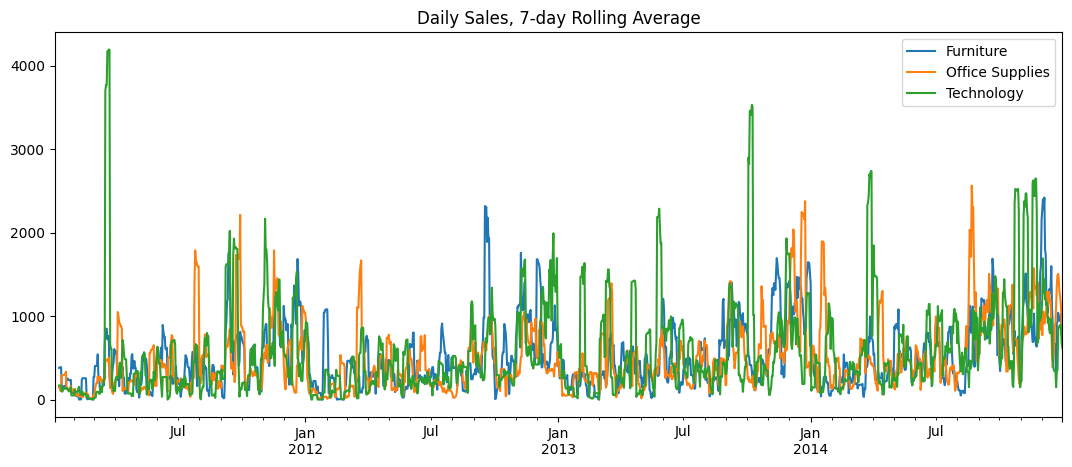

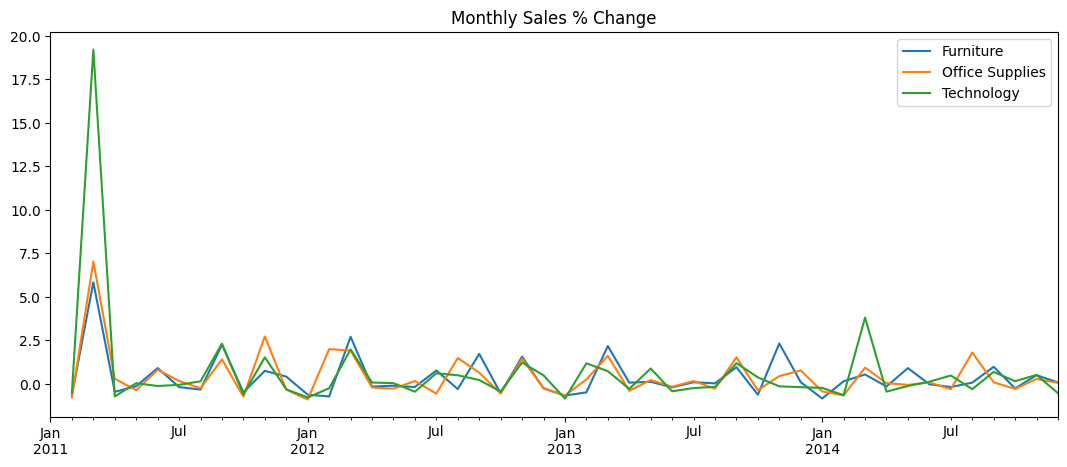

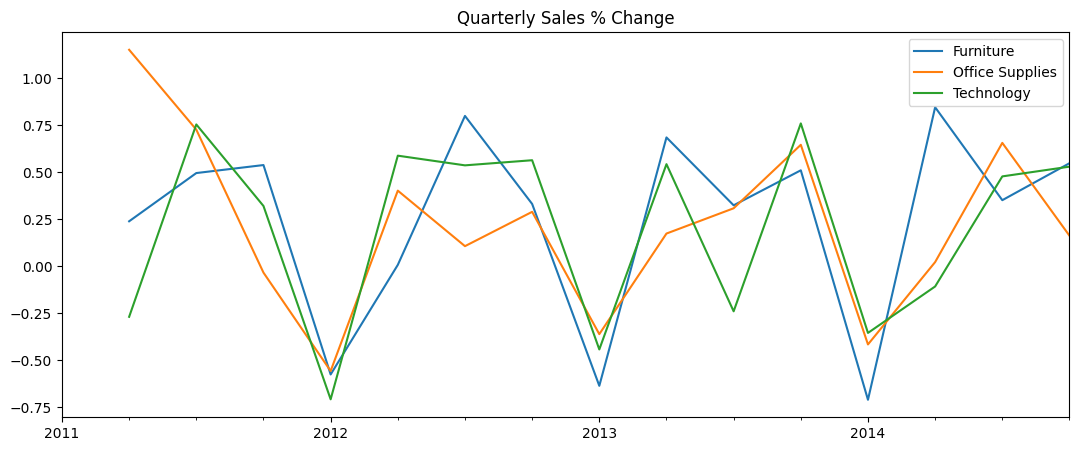

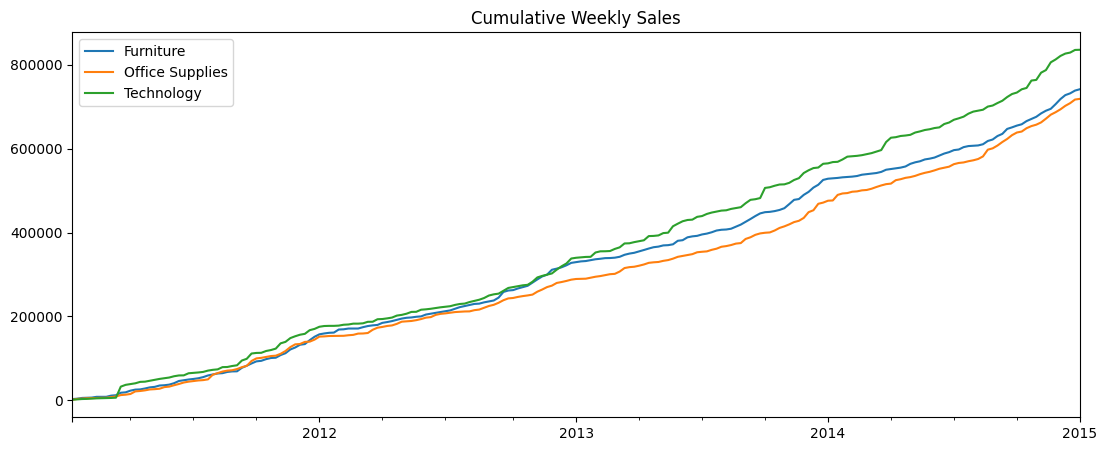

In [ ]:
rolling_window.mean().plot(figsize=plotsize, title='Daily Sales, 7-day Rolling Average')

# Monthly Sales Percent Change
sales_monthly.pct_change().plot(figsize=plotsize, title='Monthly Sales % Change')

# Quarterly Sales Growth
sales_quarterly.pct_change().plot(figsize=plotsize, title='Quarterly Sales % Change')

# Cumulative Weekly Sales
sales_weekly.cumsum().plot(figsize=plotsize, title='Cumulative Weekly Sales')

### Time Series Visualization

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot,  quarter_plot

<b>plot_acf:</b> Plot of the Autocorrelation Function<br>
<b>plot_pacf:</b> Plot of the Partial Autocorrelation Function<br>
These first two plots finds if there is any correlation between one period and the next.<br>
<b>month_plot:</b> Seasonal plot for monthly data<br>
<b>quarter_plot:</b> Seasonal plot for quarterly data<br>

Daily data Autocorrelation Plots


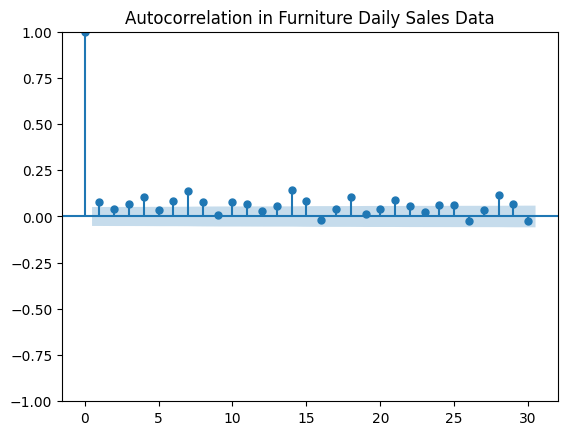

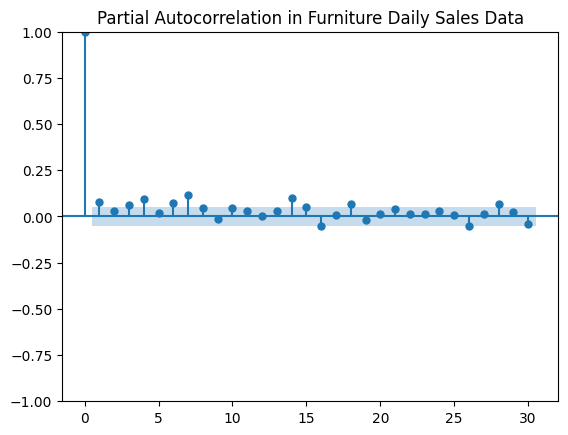

In [ ]:
print('Daily data Autocorrelation Plots')
plot_acf(sales_new['Furniture'], lags = 30, title='Autocorrelation in Furniture Daily Sales Data')
pacf_plot = plot_pacf(sales_new['Furniture'], lags=30, title='Partial Autocorrelation in Furniture Daily Sales Data')

none of the lags correlation is statistically significance. We see some of them jump up, however none of them are too high up in regards to how much they correlate with the past value. 


Weekly data Autocorrelation Plots


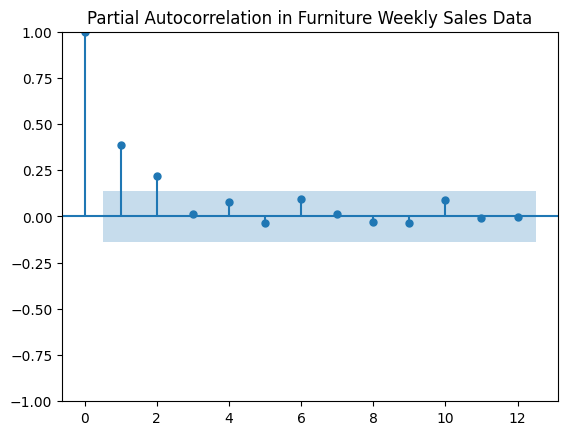

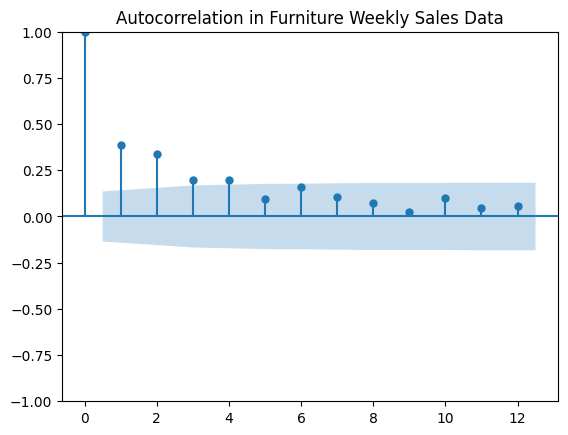

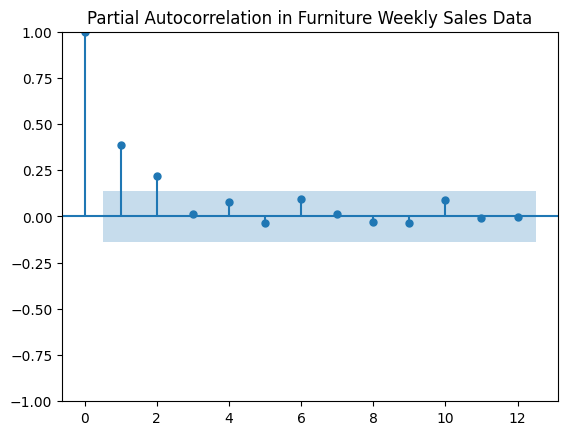

In [ ]:
print('\nWeekly data Autocorrelation Plots')
plot_acf(sales_weekly['Furniture'], lags=12, title='Autocorrelation in Furniture Weekly Sales Data')
plot_pacf(sales_weekly['Furniture'], lags=12, title='Partial Autocorrelation in Furniture Weekly Sales Data')


Monthly Data Seasonal Plot


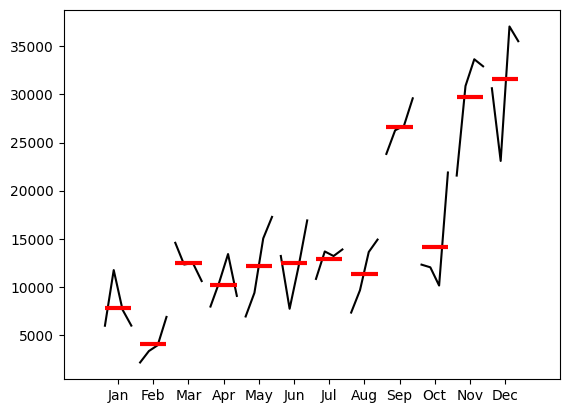

In [ ]:
print('\nMonthly Data Seasonal Plot')
m_plot = month_plot(sales_monthly['Furniture'])


 Quarterly Data Plot


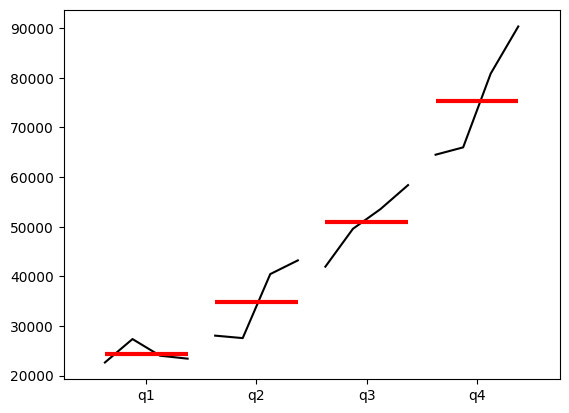

In [ ]:
print('\n Quarterly Data Plot')
q_plot = quarter_plot(sales_quarterly['Furniture'])
# the red line is the average of values

### Additional investigation
1- Using the source data, we want to set up Monthly data for Sales and Profit by Segment using (1) Resampling or (2) Grouping data by Month and year

In [ ]:
new_vars = ['Order Date', 'Segment', 'Sales', 'Profit']
new_base = df[new_vars]# index is int range

In [ ]:
ps_pivot = new_base.pivot_table(index = 'Order Date', columns = 'Segment', aggfunc = 'sum').fillna(0)
display(ps_pivot.head())
#sales_pivot.columns
#sales_pivot.columns.rename([None, None], inplace = True)

Profit                          Sales                      
Segment    Consumer Corporate Home Office Consumer Corporate Home Office
Order Date                                                              
2011-01-04     5.55      0.00        0.00    16.45      0.00        0.00
2011-01-05     0.00      0.00      -65.99     0.00      0.00      288.06
2011-01-06     4.88      0.00        0.00    19.54      0.00        0.00
2011-01-07     9.33      5.24    1,343.48    19.44     12.78    4,374.88
2011-01-08   -71.96      0.00        0.00    87.16      0.00        0.00

In [ ]:
# Aggregate monthly sales/profits

# Method 1:
s_monthly = ps_pivot.groupby(by=[ps_pivot.index.year, ps_pivot.index.month])['Sales'].sum()
p_monthly = ps_pivot.groupby(by=[ps_pivot.index.year, ps_pivot.index.month])['Profit'].sum()
p_monthly.join(s_monthly).head()
#display(profit_monthly.head())

Profit                           Sales            \
Segment               Consumer Corporate Home Office  Consumer Corporate   
Order Date Order Date                                                      
2011       1            762.81    300.91    1,383.05  6,637.15  1,701.53   
           2            500.29    307.30       58.14  3,458.52  1,183.67   
           3            597.28    333.05     -431.60 11,869.30 11,106.80   
           4          1,155.08  1,393.38      940.38  9,108.61 14,131.73   
           5            698.92  2,063.50      -23.71 12,819.16  9,142.00   

                                   
Segment               Home Office  
Order Date Order Date              
2011       1             5,607.55  
           2               168.37  
           3            32,714.91  
           4             5,055.00  
           5             1,687.12

In [ ]:
#Method 2:
# for some modelings, resampling requires standarzizing before usage. Here though we can skip it.
new_base.set_index('Order Date', inplace = True)
ps_monthly = ps_pivot.resample('M').sum()
ps_monthly.head()

Profit                           Sales                      
Segment    Consumer Corporate Home Office  Consumer Corporate Home Office
Order Date                                                               
2011-01-31   762.81    300.91    1,383.05  6,637.15  1,701.53    5,607.55
2011-02-28   500.29    307.30       58.14  3,458.52  1,183.67      168.37
2011-03-31   597.28    333.05     -431.60 11,869.30 11,106.80   32,714.91
2011-04-30 1,155.08  1,393.38      940.38  9,108.61 14,131.73    5,055.00
2011-05-31   698.92  2,063.50      -23.71 12,819.16  9,142.00    1,687.12

2- Analyze the results from above to determine whether Autocorrelation or Seasonal patterns differ by Segment or whether we are looking at Sales or Profits.

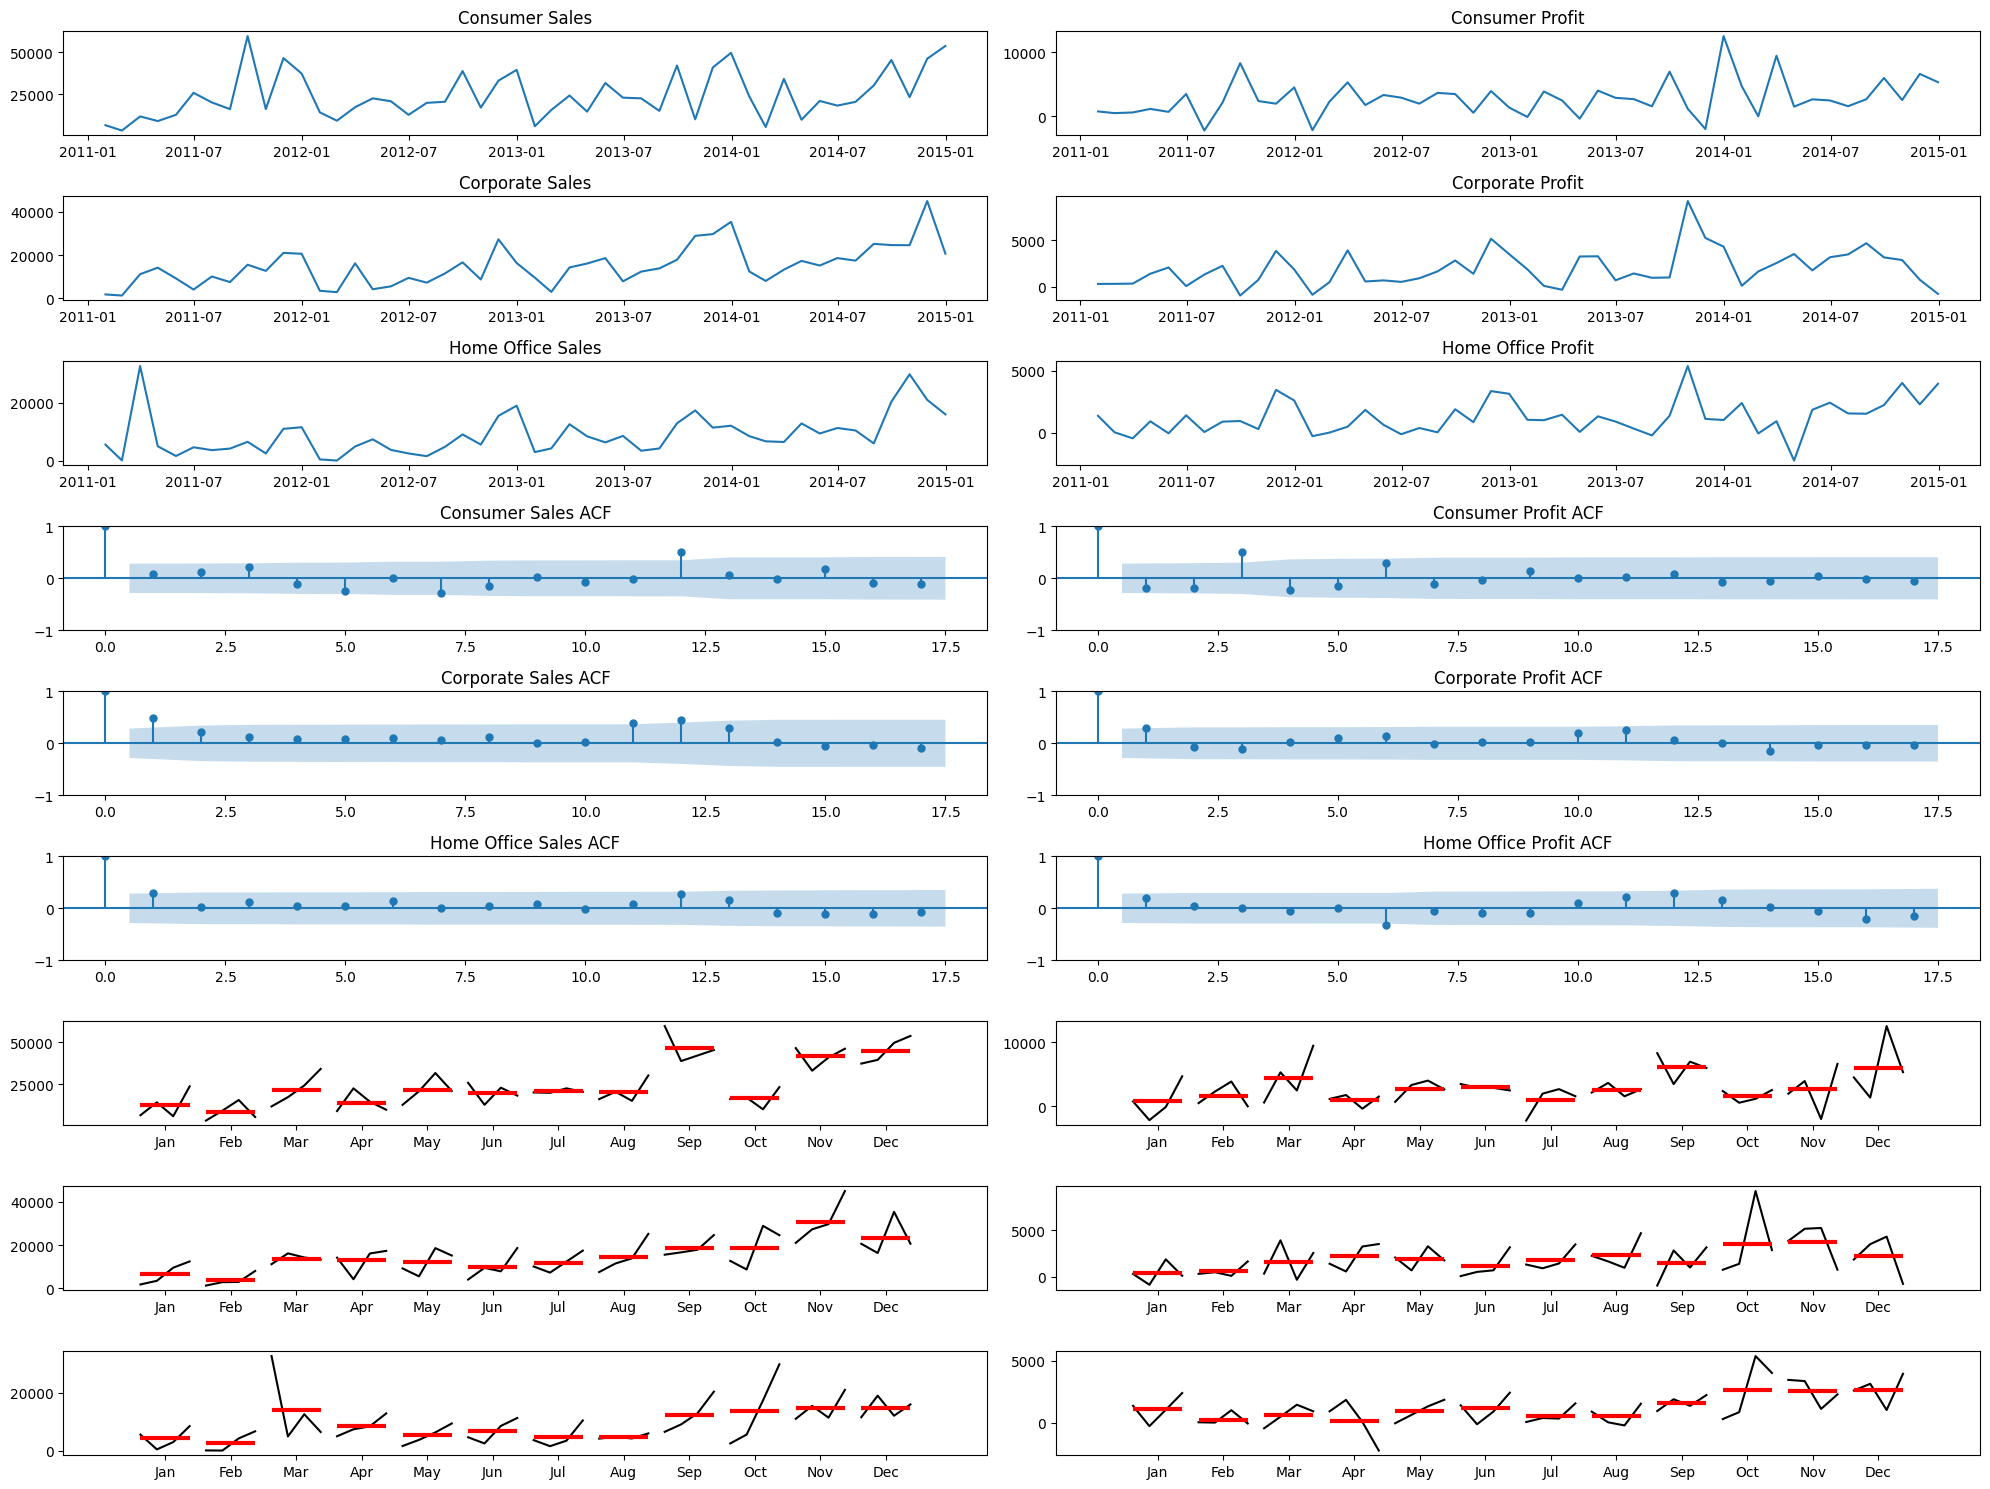

In [ ]:
fig, axes = plt.subplots(9,2, figsize = (20,15),)
for i, cat in enumerate(new_base['Segment'].unique()):
    for j, money in enumerate(['Sales', 'Profit']):
        axes[i,j].plot(ps_monthly[money, cat])
        axes[i,j].title.set_text(cat+" "+money)
        fig = plot_acf(ps_monthly[money,cat], ax=axes[i+3,j], title = cat+' '+money+' ACF')
        month_plot(ps_monthly[money,cat], ax=axes[i+6,j])
        
fig.tight_layout()
plt.show()

Seasonal patterns across groups are pretty similar and there is very little autocorrelation.

3- Use the result from above to develop an EDA function to explore other variables (like Region or Sub-Category) that may be of interest.

In [ ]:
feature_var = 'Region'
date_var = 'Order Date'
money_vars = ['Profit', 'Sales']

def monthly_EDA(feature_var = feature_var,
                date_var = date_var,
                money_vars = money_vars):
    new_vars = [feature_var, date_var] + money_vars
    cats = list(df[feature_var].unique())
    num_cats = len(cats)
    new_base = df[new_vars].set_index(date_var)
    ps_pivot = new_base.pivot_table(index = date_var, columns = feature_var, aggfunc = 'sum')
    ps_monthly = ps_pivot.resample('M').sum()
    #display(ps_monthly.head())
    
    fix, axes = plt.subplots(num_cats*3, 2, figsize = (20, 5*num_cats),)
    for i, cat in enumerate(new_base[feature_var].unique()):
        for j, money in enumerate(money_vars):
            axes[i,j].plot(ps_monthly[money, cat])
            axes[i,j].title.set_text(cat+" "+money)
            fig = plot_acf(ps_monthly[money,cat], ax=axes[i+num_cats,j], title = cat+' '+money+' ACF')
            fig = month_plot(ps_monthly[money,cat], ax=axes[i+num_cats*2,j])
            axes[i+num_cats*2,j].title.set_text(cat+" Seasonality")
    
    fig.tight_layout()
    plt.show()

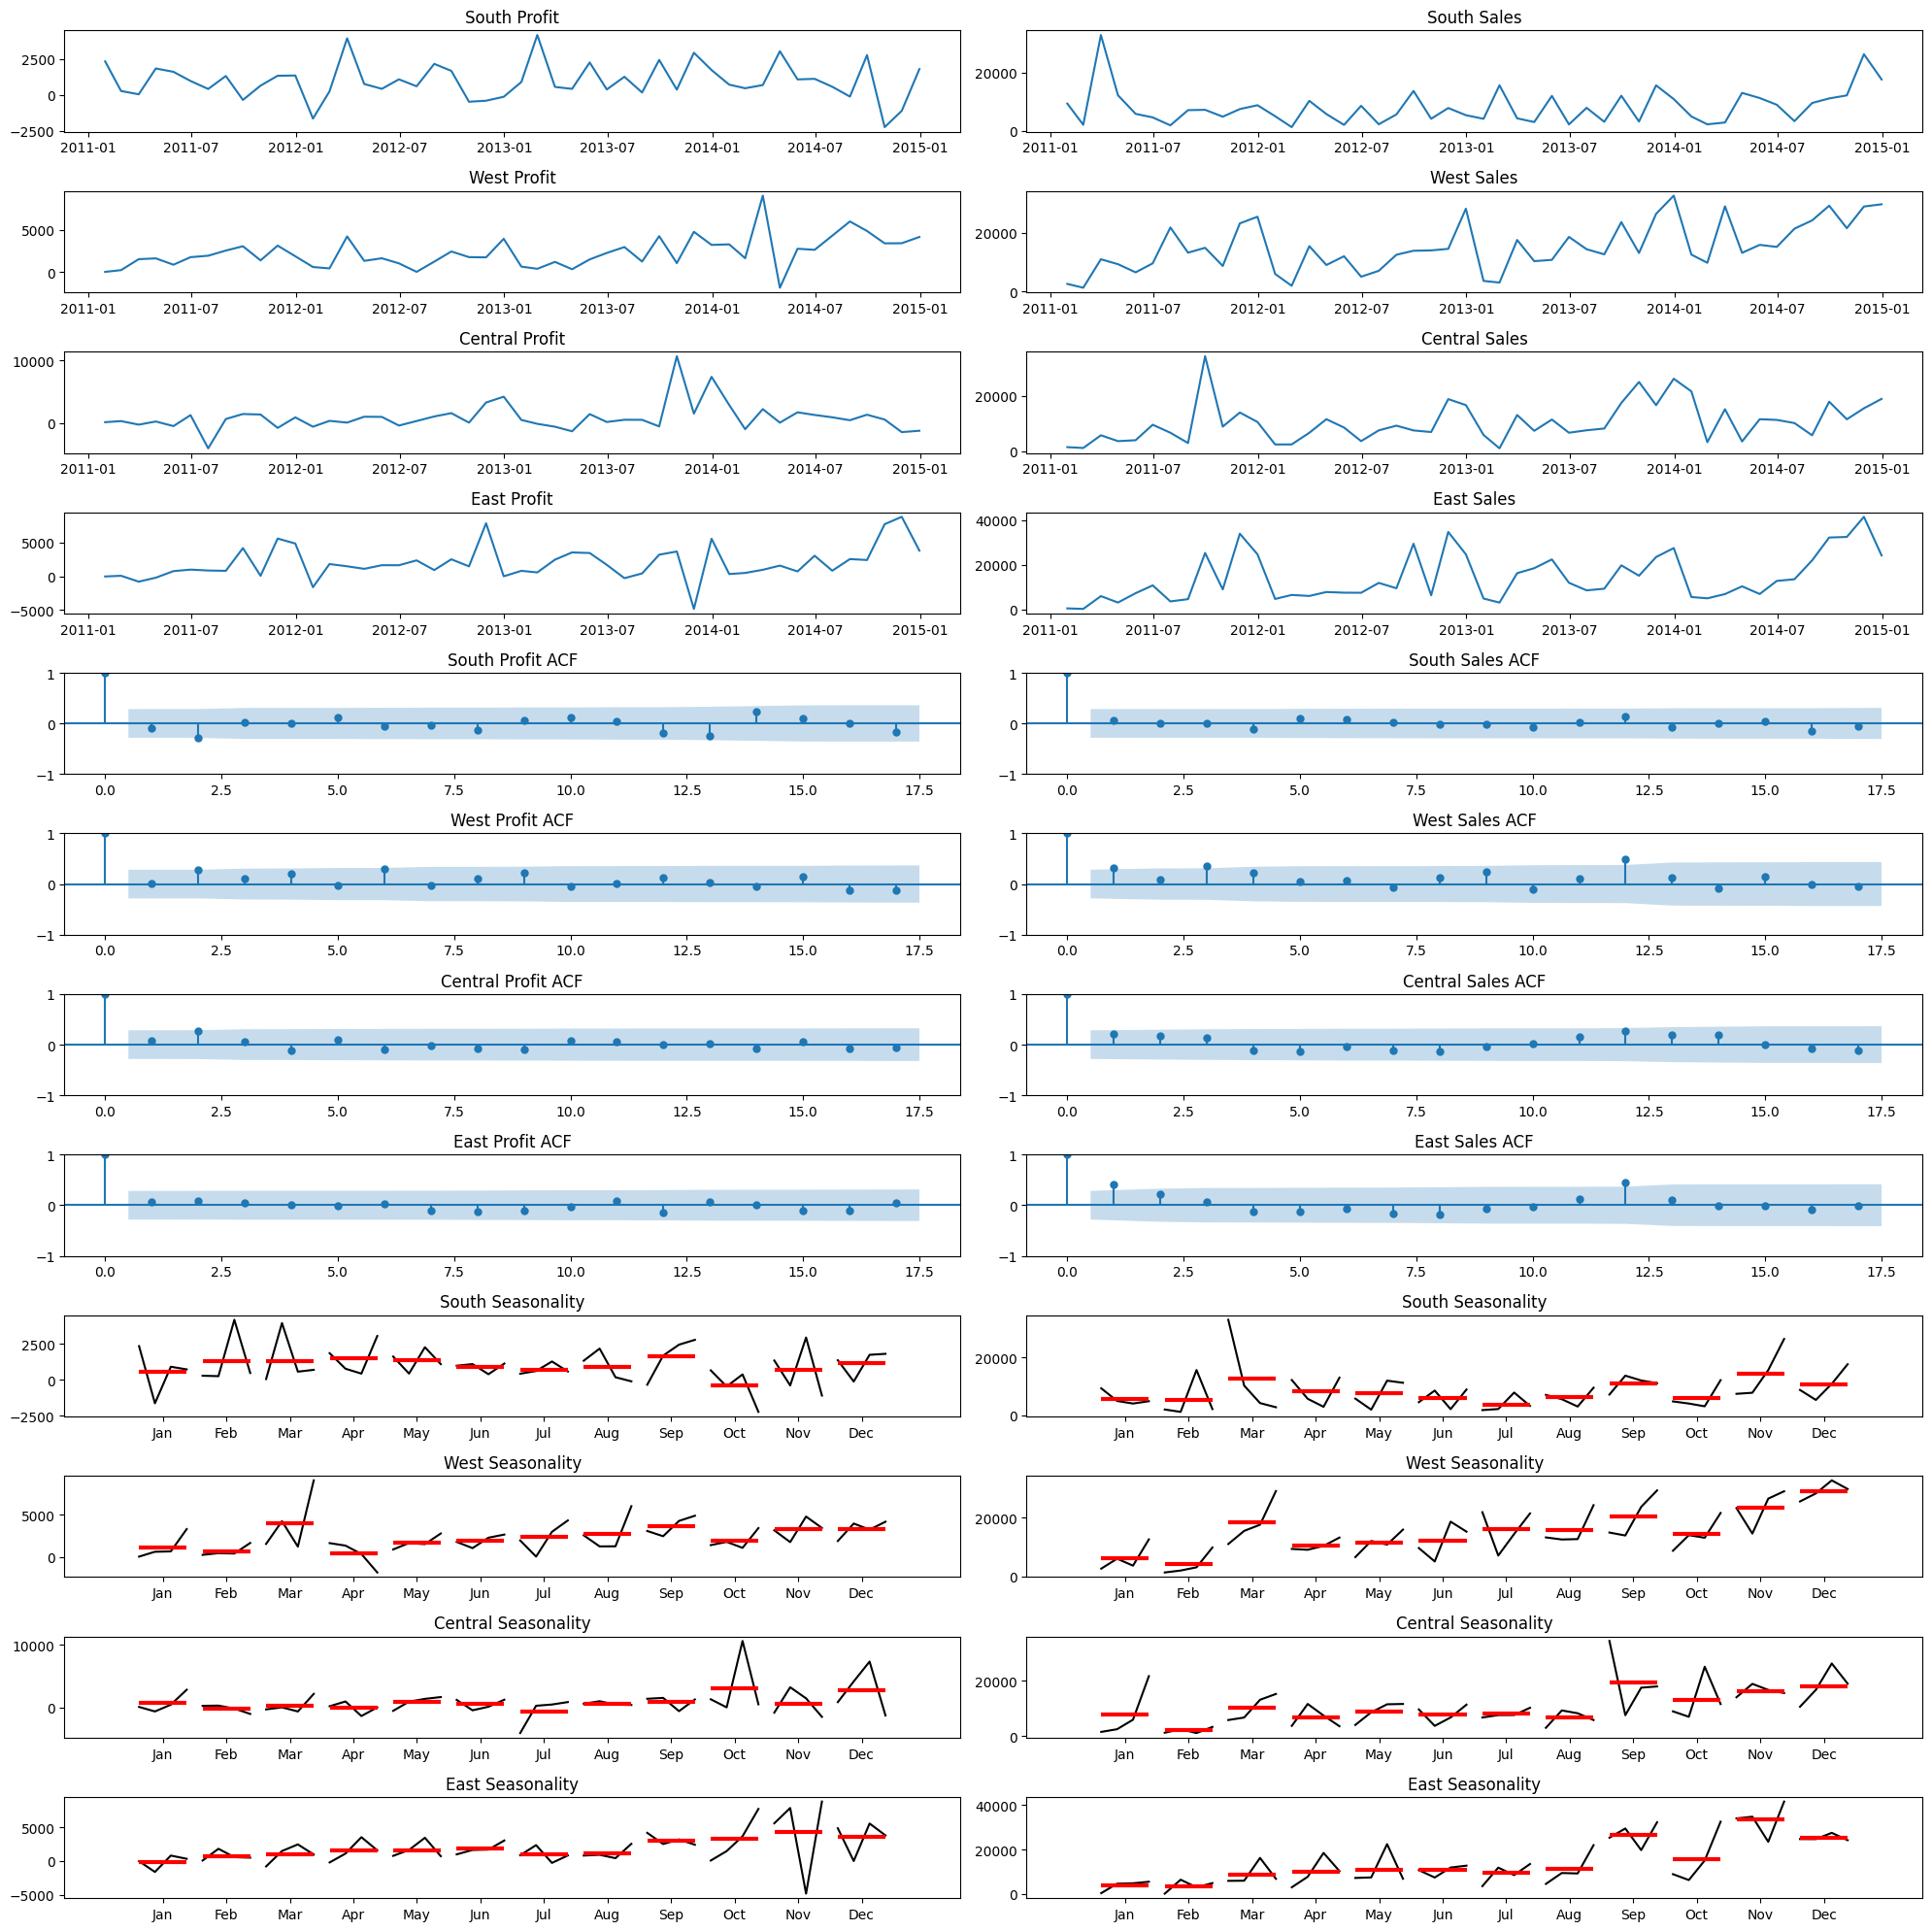

In [ ]:
monthly_EDA(feature_var = 'Region')

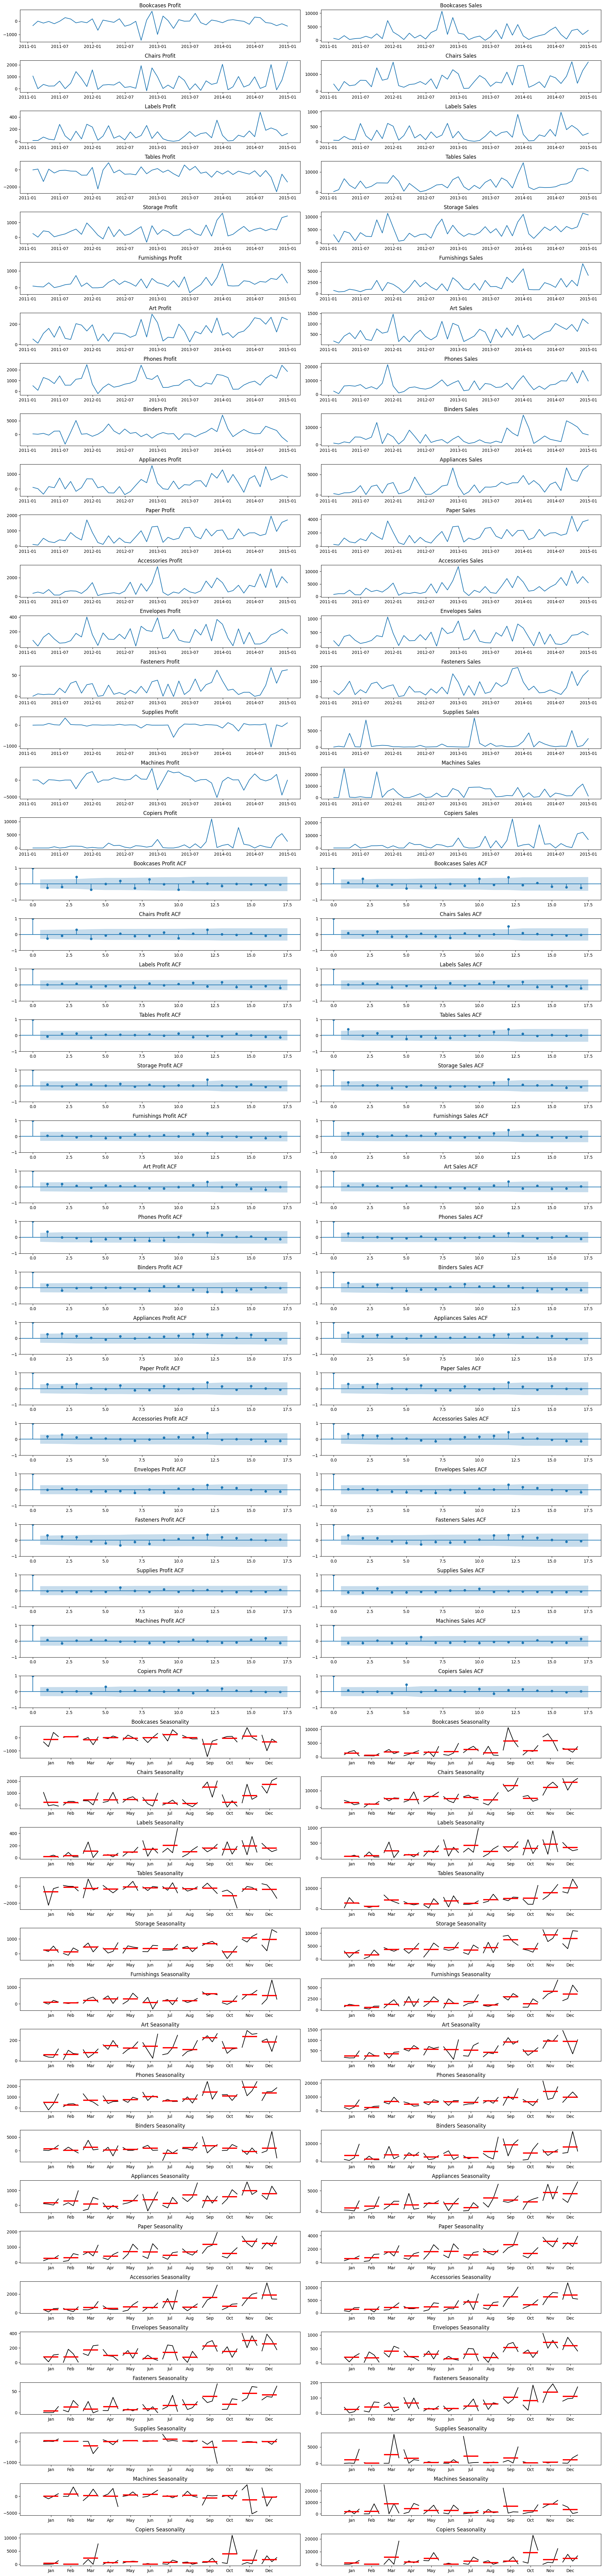

In [ ]:
monthly_EDA(feature_var='Sub-Category')